In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
import xarray as xr

In [4]:
def compute_mcmc_statistics(mcmc_chains, sample_index):
  num_chains = len(mcmc_chains)
  chain_length = mcmc_chains[0].shape[0]
  chains_array = np.array([mcmc_chains[i][:, sample_index] for i in range(num_chains)]) # re-arrange mcmc chains
  chains_dataset = xr.Dataset(
      {"posterior": (("chain", "draw"), chains_array)},
      coords={"chain": np.arange(num_chains), "draw": np.arange(chain_length)}
  )
  inference_data = az.InferenceData(posterior=chains_dataset)
  return az.rhat(inference_data)['posterior'].values, az.ess(inference_data)['posterior'].values

def fill_triangular(L, D_in):
    lower_indices = np.tril_indices(D_in)
    l_matrix = np.zeros((D_in, D_in), dtype=L.dtype)
    l_matrix[lower_indices] = L
    return l_matrix

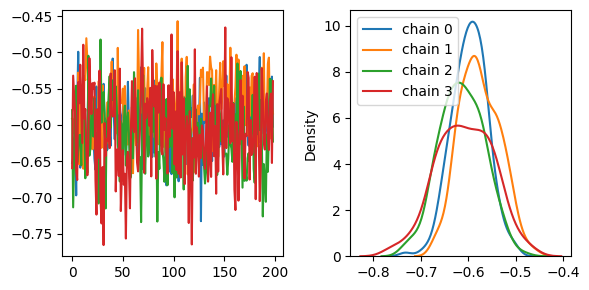

In [66]:
sample = 3
fig, axs = plt.subplots(1, 2, figsize=(6,3))
for chain in [0, 1, 2, 3]:
    y_mean = np.load(f'results/run-0005/kernel/data_chain_{chain}.npz')['test_predictions'].squeeze()[:,sample]
    n_iters = y_mean.shape[0]
    sns.lineplot(x=np.arange(n_iters), y=y_mean,  ax=axs[0])
    sns.kdeplot(x=y_mean, ax=axs[1], label=f'chain {chain}')

plt.legend()
plt.tight_layout()
plt.show()

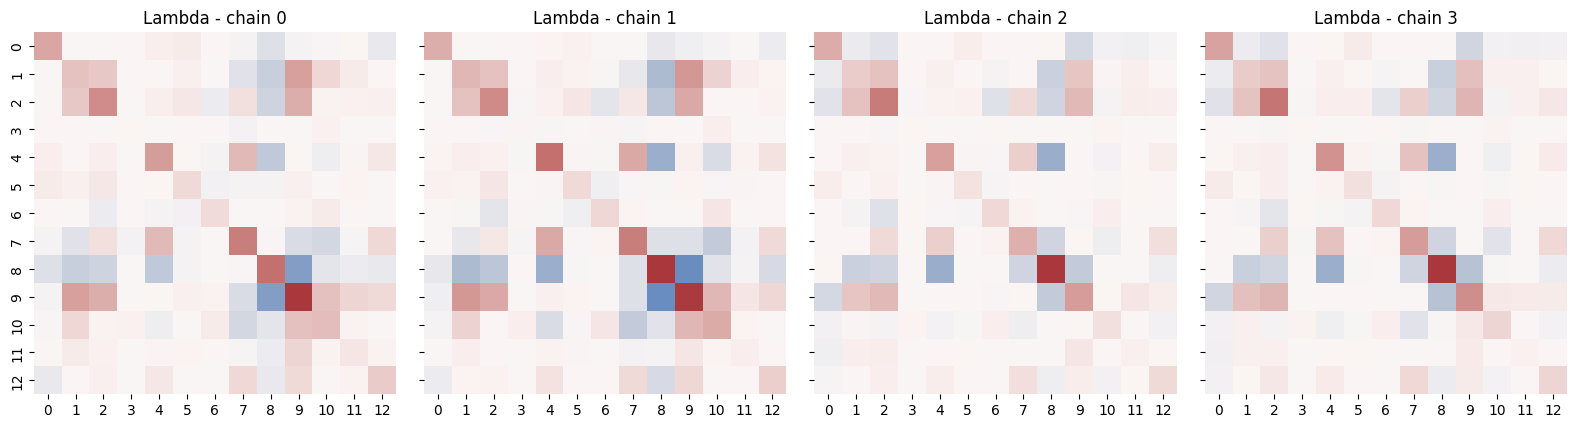

In [67]:
num_chains = 4
fig, axs = plt.subplots(1, num_chains, sharey=True, figsize=(num_chains*4,4))
for chain in range(num_chains):
    chain_data = np.load(f'results/run-0005/kernel/data_chain_{chain}.npz')
    D = chain_data['D']
    num_samples = chain_data['kern.L'].shape[0]
    precision_samples = np.empty((num_samples, D, D)) # S x D x D
    for s in  range(num_samples):
        L =  fill_triangular(chain_data['kern.L'][s], D) 
        precision = L @ L.T
        precision_samples[s] = precision
    precision_mean = np.mean(precision_samples, axis=0) # D x D
    precision_std = np.std(precision_samples, axis=0) # D x D
    sns.heatmap(precision_mean, cmap='vlag', vmin=-np.max(precision_mean), center=0, vmax=np.max(precision_mean), square=True, cbar=False, ax=axs[chain])
    axs[chain].set_title(f'Lambda - chain {chain}')

plt.tight_layout()
plt.show()

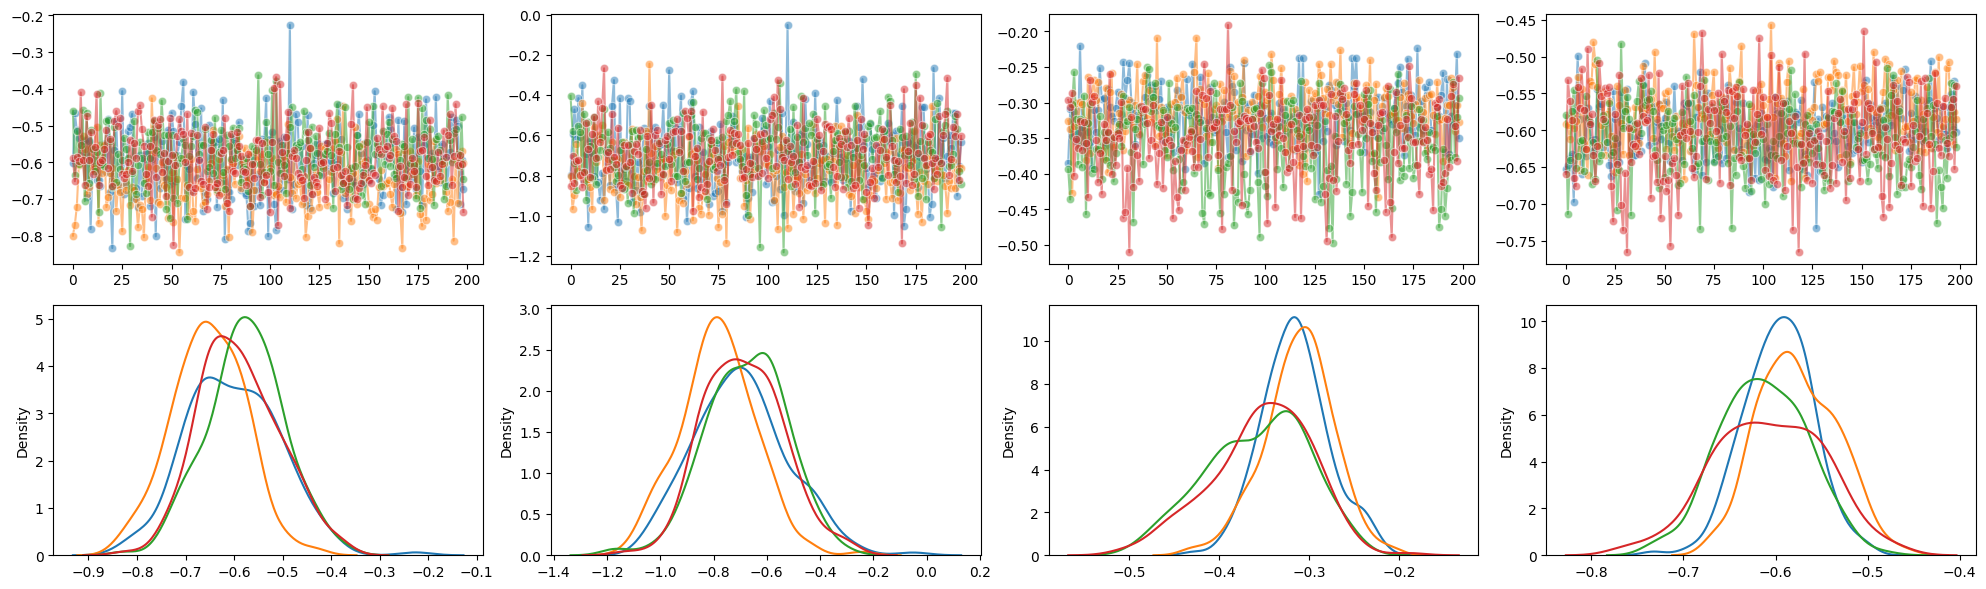

In [68]:
num_chains = 4
samples_idx = [0, 1, 2, 3]
fig, axs = plt.subplots(2, len(samples_idx), figsize=(len(samples_idx)*5, 6))
for chain in range(num_chains):
    y_mean = np.load(f'results/run-0005/kernel/data_chain_{chain}.npz')['test_predictions'].squeeze()
    for plot_idx, sample in enumerate(samples_idx):
        sns.lineplot(x=np.arange(y_mean.shape[0]), y=y_mean[:,sample], ax=axs[0,plot_idx], alpha=.5, marker='o')
        sns.kdeplot(x=y_mean[:,sample],  ax=axs[1,plot_idx])
        #axs[1,plot_idx].set_xlim([-2,2])

plt.tight_layout()
plt.show()

In [69]:
chain_0 = np.load(f'results/run-0005/kernel/data_chain_{0}.npz')['test_predictions'].squeeze()
chain_1 = np.load(f'results/run-0005/kernel/data_chain_{1}.npz')['test_predictions'].squeeze()
chain_2 = np.load(f'results/run-0005/kernel/data_chain_{2}.npz')['test_predictions'].squeeze()
chain_3 = np.load(f'results/run-0005/kernel/data_chain_{3}.npz')['test_predictions'].squeeze()
rhat_list = []
ess_list = []
for sample_index in range(99):
  rhat, ess = compute_mcmc_statistics([chain_0, chain_1, chain_2], sample_index)
  rhat_list.append(rhat)
  ess_list.append(ess)
  #print(f'sample {sample_index}: rhat={rhat} ess={ess}')
print(f'average rhat={np.mean(rhat_list)}, average ess={np.mean(ess_list)}')

average rhat=1.10079658038099, average ess=164.74406634995043


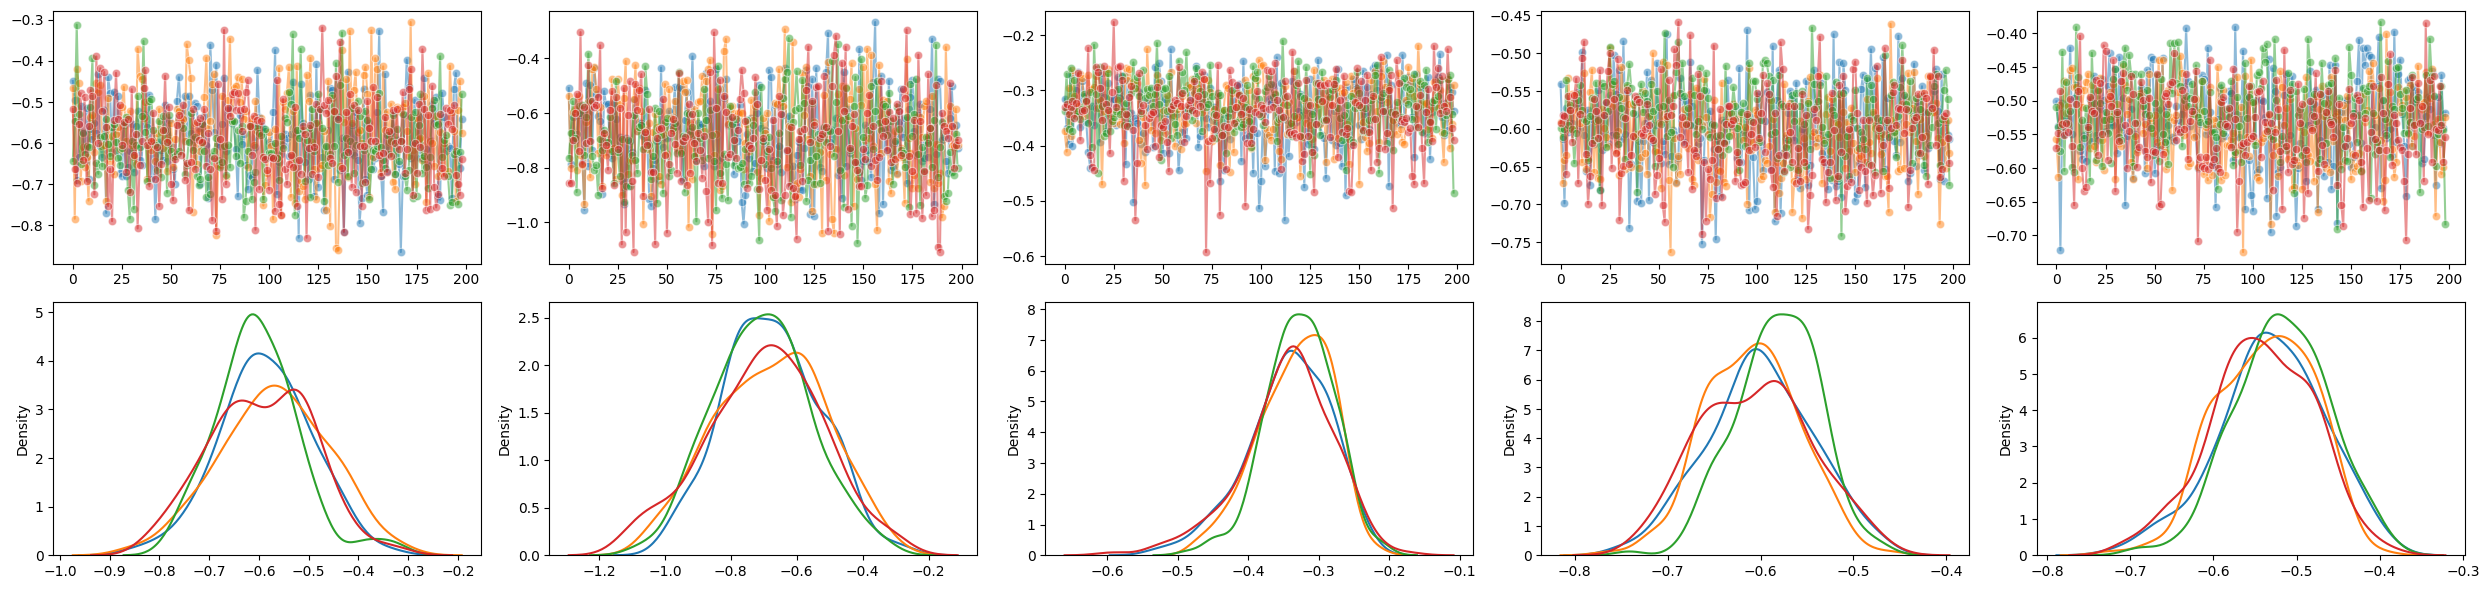

In [26]:
# FOLDER 41
num_chains = 4
samples_idx = [0, 1, 2, 3, 4]
fig, axs = plt.subplots(2, len(samples_idx), figsize=(len(samples_idx)*5, 6))
for chain in range(num_chains):
    y_mean = np.load(f'results/run-0041/kernel/data_chain_{chain}.npz')['test_predictions'].squeeze()
    for plot_idx, sample in enumerate(samples_idx):
        sns.lineplot(x=np.arange(199), y=y_mean[:,sample], ax=axs[0,plot_idx], alpha=.5, marker='o')
        sns.kdeplot(x=y_mean[:,sample],  ax=axs[1,plot_idx])

plt.tight_layout()
plt.show()

In [1]:
chain_0 = np.load(f'results/run-0041/kernel/data_chain_{0}.npz')['test_predictions'].squeeze()
chain_1 = np.load(f'results/run-0041/kernel/data_chain_{1}.npz')['test_predictions'].squeeze()
chain_2 = np.load(f'results/run-0041/kernel/data_chain_{2}.npz')['test_predictions'].squeeze()
chain_3 = np.load(f'results/run-0041/kernel/data_chain_{3}.npz')['test_predictions'].squeeze()
rhat_list = []
ess_list = []
for sample_index in range(99):
  rhat, ess = compute_mcmc_statistics([chain_0, chain_1, chain_2, chain_3], sample_index)
  rhat_list.append(rhat)
  ess_list.append(ess)
  #print(f'sample {sample_index}: rhat={rhat} ess={ess}')
print(f'average rhat={np.mean(rhat_list)}, average ess={np.mean(ess_list)}')

NameError: name 'np' is not defined

<Axes: >

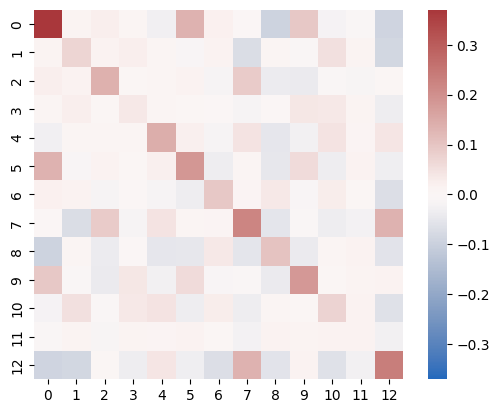

In [8]:
# Read samples KFOLD (no PCA)
k = 2
kernel_data = np.load(f'results/run-0005/kernel/kernel_samples_fold_{k}.npz')
D = kernel_data['D']
num_samples = kernel_data['kern.L'].shape[0]
precision_samples = np.empty((num_samples, D, D)) # S x D x D
for s in  range(num_samples):
    L =  fill_triangular(kernel_data['kern.L'][s], D) 
    precision = L @ L.T
    precision_samples[s] = precision
precision_mean = np.mean(precision_samples, axis=0) # D x D
precision_std = np.std(precision_samples, axis=0) # D x D
sns.heatmap(precision_mean, cmap='vlag', vmin=-np.max(precision_mean), center=0, vmax=np.max(precision_mean), square=True, cbar=True)

In [2]:
def fill_triangular(L, D_in):
    lower_indices = np.tril_indices(D_in)
    l_matrix = np.zeros((D_in, D_in), dtype=L.dtype)
    l_matrix[lower_indices] = L
    return l_matrix

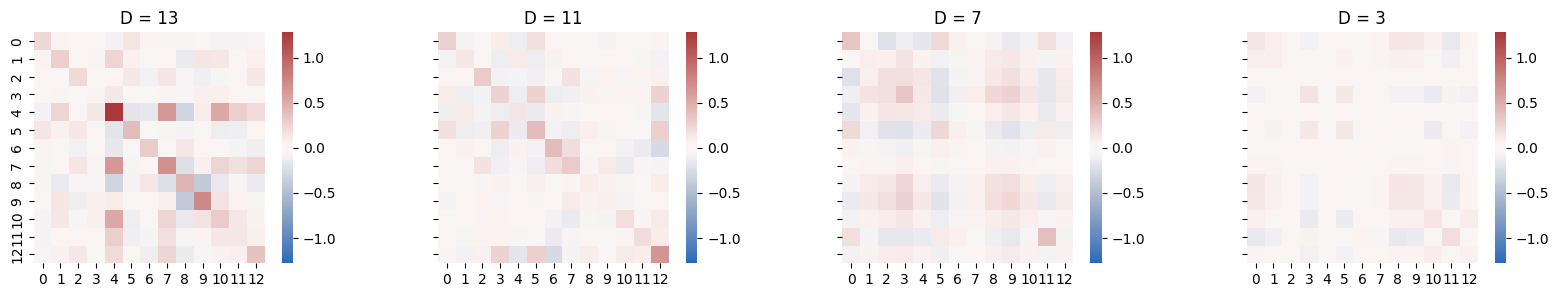

In [7]:
# load precision matrices
k = 0
precision_mean_pca = []
precision_std_pca = []

# No PCA
kernel_data = np.load(f'results/run-0009/kernel/kernel_samples_fold_{k}.npz')
D = kernel_data['D']
num_samples = kernel_data['kern.L'].shape[0]
precision_samples = np.empty((num_samples, D, D)) # S x D x D
for s in  range(num_samples):
    L =  fill_triangular(kernel_data['kern.L'][s], D) 
    precision = L @ L.T
    precision_samples[s] = precision
precision_mean_pca.append(np.mean(precision_samples, axis=0))
precision_std_pca.append(np.std(precision_samples, axis=0))

# PCA
for folder in ['0006', '0007', '0008']:
    kernel_data = np.load(f'results/run-{folder}/kernel/kernel_samples_fold_{k}.npz')
    D = kernel_data['Pd'].shape[0]
    K = kernel_data['Pd'].shape[1]
    num_samples = kernel_data['kern.L'].shape[0]
    precision_samples = np.empty((num_samples, D, D)) # S x D x D
    for s in  range(num_samples):
        L =  fill_triangular(kernel_data['kern.L'][s], K) 
        Pd = kernel_data['Pd']
        precision = L @ L.T
        precision_samples[s] = Pd @ precision @ Pd.T
    precision_mean = np.mean(precision_samples, axis=0) # D x D
    precision_std = np.std(precision_samples, axis=0) # D x D
    precision_mean_pca.append(precision_mean)
    precision_std_pca.append(precision_std)


fig, axs = plt.subplots(1, 4, figsize=(20, 3), sharey=True)
max = np.max([precision_mean_pca[0], precision_mean_pca[1], precision_mean_pca[2], precision_mean_pca[3]])
i = 0
for precision_mean, num_latent in zip(precision_mean_pca, [13, 11, 7, 3]):
    sns.heatmap(precision_mean, cmap='vlag', vmin=-max, center=0, vmax=max, square=True, cbar=True, ax=axs[i])
    axs[i].set_title(f'D = {num_latent}')
    i += 1

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


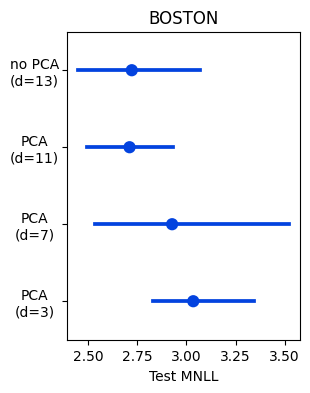

In [4]:
data = {'pca': ['no PCA\n(d=13)', 'PCA\n(d=11)', 'PCA\n(d=7)', 'PCA\n(d=3)'],
        'test_mnll': []
        }
for num_latent, folder in zip([13,11,7,3], ['0009', '0006', '0007', '0008']):
    test_mnll_folds = []
    for fold in range(3):
        kernel_data = np.load(f'results/run-{folder}/kernel/kernel_samples_fold_{fold}.npz')
        test_mnll_folds.append(kernel_data['test_mnll'][None][0])
    data['test_mnll'].append(test_mnll_folds)
df = pd.DataFrame(data)
df = df.explode('test_mnll', ignore_index=True)
colors = ["blue"]
cp = sns.xkcd_palette(colors)

fig, ax = plt.subplots(1, 1, figsize=(3, 4))
sns.pointplot(data=df, x='test_mnll', y='pca', palette=cp, join=False, dodge=True, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel('Test MNLL')
ax.set_title('BOSTON')
ax.set_yticklabels(data['pca'], ha="center") # ha and position adjustments
ax.tick_params(axis='y', pad=20)
plt.legend().set_visible(False)
plt.show()

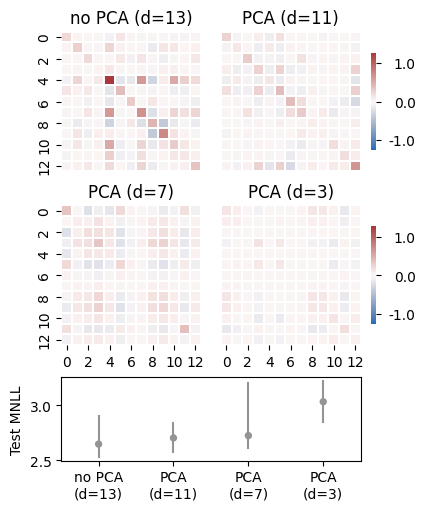

In [9]:
axd = plt.figure(layout="compressed", figsize=(5, 5)).subplot_mosaic(
    """
    AB
    CD
    EE
    """,
    gridspec_kw=dict(height_ratios=[1, 1, 0.6])
)

colors = ["grey"]
cp = sns.xkcd_palette(colors)
i = 0
j = 0
max = np.max([m for m in precision_mean_pca])
for m_pca, pca, ax_letter in zip(precision_mean_pca,['no',11,7,3],['A','B','C','D']):
  ax = axd[ax_letter]
  cbar = True if ax_letter == 'B' or ax_letter == 'D' else False
  h = sns.heatmap(m_pca, annot=False, square=True, cmap='vlag', vmax=max, vmin=-max, center=0., linewidth=.3, cbar=cbar, cbar_kws={"shrink": 0.7, "format": '%.1f'}, ax=ax)
  #sns.heatmap(m_nopca, annot=False, square=True, cmap='Blues', vmax=max, vmin=0, center=max/2., linewidth=.3, cbar_ax=axs[i,2], ax=axs[i,1])
  ax.set_title('PCA (d=%d)'%pca) if pca != 'no' else ax.set_title('no PCA (d=13)')
  if ax_letter == 'B' or ax_letter == 'D':
    h.set_yticks([])
    h.set_ylabel('')
  if ax_letter == 'A' or ax_letter == 'B':
    h.set_xlabel('')
    h.set_xticks([])
  if cbar == True:
    cb = h.collections[0].colorbar
    plt.setp(cb.ax.get_yticklabels(), ha="right")
    cb.ax.yaxis.set_tick_params(pad=25)
  j += 1
  if j==2:
    i = 1
    j = 0
sns.pointplot(data=df, x='pca', y='test_mnll', palette=cp, join=False, scale=.6, errorbar=('pi', 60), errwidth=1.5, estimator='median', dodge=True, ax=axd['E'])
axd['E'].set_ylabel('Test MNLL')
axd['E'].set_xlabel('')
#axd['E'].set_yticklabels(data['pca'], ha="center") # ha and position adjustments
#axd['E'].tick_params(axis='y', pad=20)
#axd['E'].axis('off')
#plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig('boston_pca_comparison_vlag.png', dpi=300, bbox_inches='tight', pad_inches=0.2)
plt.show()